In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import metrics


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
# альтернативно можно использовать StratifiedKFold т.к. задача классификации
import seaborn as sns # чтобы подкрасить таблички

In [ ]:
df = pd.read_csv('/content/df2.csv', delimiter = ',')
df=df.drop("class",axis=1)
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,prestige
0,Toyota,Prius,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,2
1,Renault,Grand Scenic,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,2
2,Renault,Laguna,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,3
3,Opel,Astra,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,3
4,Mercedes,Vito,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32074 entries, 0 to 32073
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32074 non-null  object 
 1   Model                 32074 non-null  object 
 2   Style                 32074 non-null  object 
 3   Distance              32074 non-null  float64
 4   Engine_capacity(cm3)  32074 non-null  float64
 5   Fuel_type             32074 non-null  object 
 6   Transmission          32074 non-null  object 
 7   Price(euro)           32074 non-null  float64
 8   Age                   32074 non-null  int64  
 9   km_year               32074 non-null  float64
 10  prestige              32074 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


In [ ]:
def calculate_r2_score(model_pipe, X, y):
    y_model = model_pipe.predict(X)
    return r2_score(y, y_model)

In [ ]:
def importances(columns ,coeficient):
  importances = pd.DataFrame(data={
    'Attribute': columns,
    'Importance':coeficient
   })
  plt.figure(figsize=(20,5))
  importances = importances.sort_values(by='Importance', ascending=False)
  plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
  plt.title('Feature importances obtained from coefficients', size=20)
  plt.xticks(rotation='vertical')
  plt.show()

In [ ]:
X = df.drop('Price(euro)', axis=1)
y = df["Price(euro)"]

In [ ]:
cat_columns = []
num_columns = []

for column_name in X.columns:
    if (X[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 len =  5
numerical columns:	  ['Distance', 'Engine_capacity(cm3)', 'Age', 'km_year', 'prestige'] 
 len =  5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_pipe_one = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))
])

cat_pipe_ordinal = Pipeline([
    ('encoder', OrdinalEncoder( ))
])

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', cat_pipe_one, cat_columns)
])
preprocessors_ = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', cat_pipe_ordinal, cat_columns)
])
pipe_one = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LinearRegression())
])
pipe_ordinal = Pipeline([
    ('preprocessors', preprocessors_),
    ('model', LinearRegression())
])

In [ ]:
pipe_one.fit(X_train,y_train)
print(f"r2 на тренировочной выборке: {calculate_r2_score(pipe_one, X_train, y_train):.4f}")

print(f"r2 на валидационной выборке: {calculate_r2_score(pipe_one, X_test, y_test):.4f}")

r2 на тренировочной выборке: 0.6805
r2 на валидационной выборке: 0.6626


In [ ]:
encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False)
train_cat_encoded = encoder.fit_transform(X_train[cat_columns])
columns = np.append(num_columns, encoder.get_feature_names_out(cat_columns))

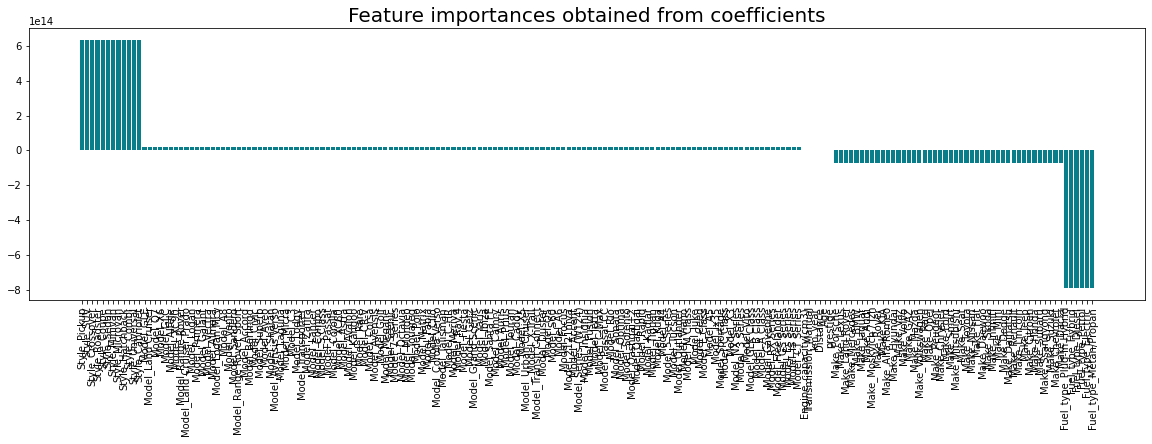

In [ ]:
importances(columns,pipe_one['model'].coef_)

In [ ]:
pipe_ordinal.fit(X_train,y_train)
print(f"r2 на тренировочной выборке: {calculate_r2_score(pipe_ordinal, X_train, y_train):.4f}")

print(f"r2 на валидационной выборке: {calculate_r2_score(pipe_ordinal, X_test, y_test):.4f}")

r2 на тренировочной выборке: 0.5971
r2 на валидационной выборке: 0.5917


In [ ]:
pipe_ordinal['model']

LinearRegression()

In [ ]:
pipe_ordinal['model'].coef_

array([-1033.27576378,  2097.16518891, -1462.3543788 ,  -328.23282196,
       -4866.99510734,   -29.19142302,     6.3984715 ,    -8.48222573,
          11.67731305,  -475.2014541 ])

In [ ]:
columns_ = np.append(num_columns, cat_columns) # объединяем названия колонок
columns_

array(['Distance', 'Engine_capacity(cm3)', 'Age', 'km_year', 'prestige',
       'Make', 'Model', 'Style', 'Fuel_type', 'Transmission'],
      dtype='<U20')

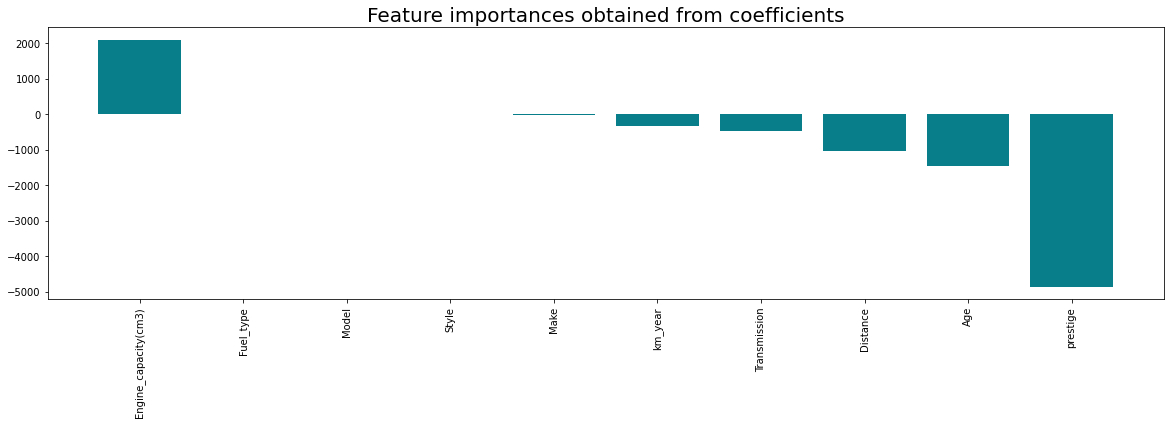

In [ ]:
importances(columns_,pipe_ordinal['model'].coef_)

In [ ]:
np.logspace(-2, 1, 20)

array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.08858668,  0.1274275 ,  0.18329807,  0.26366509,
        0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
        2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ])

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
pipe = Pipeline([
    ('preprocessors', preprocessors_),
    ('model', Ridge())
])
param_grid = [{
                    #'model':['Ridge',' Lasso'],
                    'model__alpha': np.logspace(-2, 1, 20),
                    'model__fit_intercept':[True,False],
                    #'model__penalty': ['l1', 'l2']
                  }]
Pipe_GS = GridSearchCV(estimator = pipe, # оптимизируем наш pipeline
                       param_grid=param_grid , # что оптимизируем - берем из словарика
                       cv=ShuffleSplit(n_splits=5, random_state=42), # указываем тип кросс-валидации
                       verbose = 2 # чтобы он всё подробно расписал. если не интересно - пишем 0
                       )
Pipe_GS.fit(X_train, y_train)
accuracies = {
    'train accuracy': Pipe_GS.score(X_train, y_train),
    'test accuracy': Pipe_GS.score(X_test, y_test)
}


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.0s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.1s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.1s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.1s
[CV] END .......model__alpha=0.01, model__fit_intercept=True; total time=   0.1s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.1s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.1s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.1s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.1s
[CV] END ......model__alpha=0.01, model__fit_intercept=False; total time=   0.1s
[CV] END model__alpha=0.01438449888287663, model__fit_intercept=True; total time=   0.1s
[CV] END model__alpha=0.014384498882876

In [ ]:
print(*accuracies.items())

('train accuracy', 0.5970585927188182) ('test accuracy', 0.5917403873962674)


In [ ]:
pipe_one_1 = Pipeline([
    ('preprocessors', preprocessors),
])
pipe_ordinal_1 = Pipeline([
    ('preprocessors', preprocessors_),
])

In [ ]:
pipe=dict()
pipe['pipe0']=pipe_one_1
pipe['pipe1']=pipe_ordinal_1

In [ ]:
def test1(models,X,y):
    results = {}
    for i in models:
      r2_train = []
      r2_test = []

      X_train, X_test, y_train, y_test = train_test_split(X,
                                                          y,
                                                          test_size= 0.2)
      X_train=pipe['pipe0'].fit_transform(X_train)
      X_test=pipe['pipe0'].transform(X_test)
      r2_test.append(metrics.r2_score(y_test,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_test)))
      r2_train.append(metrics.r2_score(y_train,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_train)))
      results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
pipe_ridge = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Ridge())
])
pipe_lasso = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Lasso())
])

In [ ]:
np.logspace(-1, 2, 20)

array([  0.1       ,   0.14384499,   0.20691381,   0.29763514,
         0.42813324,   0.61584821,   0.88586679,   1.27427499,
         1.83298071,   2.6366509 ,   3.79269019,   5.45559478,
         7.8475997 ,  11.28837892,  16.23776739,  23.35721469,
        33.59818286,  48.32930239,  69.51927962, 100.        ])

In [ ]:
lasso_params = {'model__alpha':np.logspace(-1, 2, 20)}
ridge_params = {'model__alpha':np.logspace(-1, 2, 20)}

models = {
           'Lasso': GridSearchCV(estimator=pipe_lasso,
                               param_grid=lasso_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(estimator=pipe_ridge,
                               param_grid=ridge_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,}

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.748e+09, tolerance: 2.056e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.399e+08, tolerance: 2.056e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
models['Lasso']['model']

Lasso(alpha=0.14384498882876628)

In [ ]:
models['Ridge']["model"]

Ridge(alpha=0.8858667904100825)

In [ ]:
models = {'Lasso': models['Lasso']['model'],
         'Ridge': models['Ridge']['model'],}

test1(models, X,y)

,Lasso,Ridge
0,0.680383,0.676308
1,0.662952,0.677492


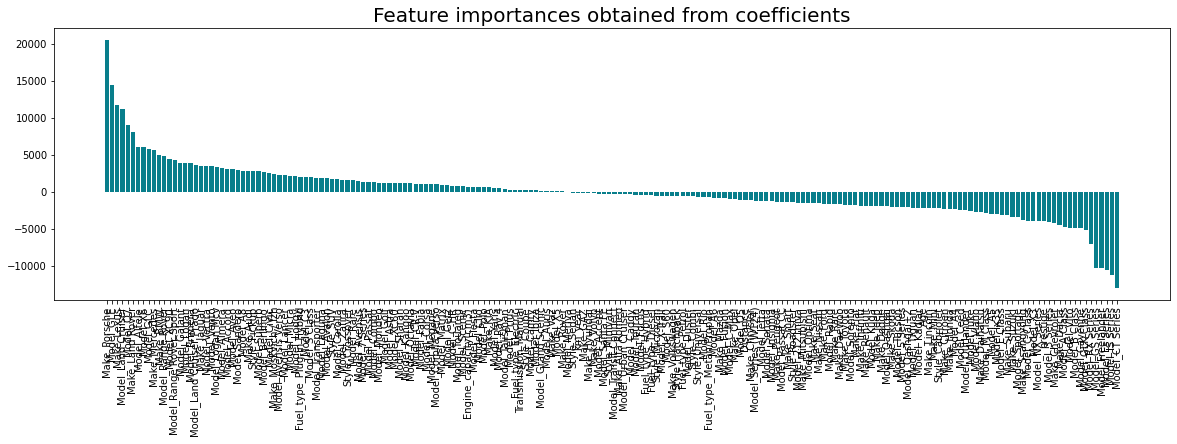

In [ ]:
importances(columns,models['Ridge'].coef_)

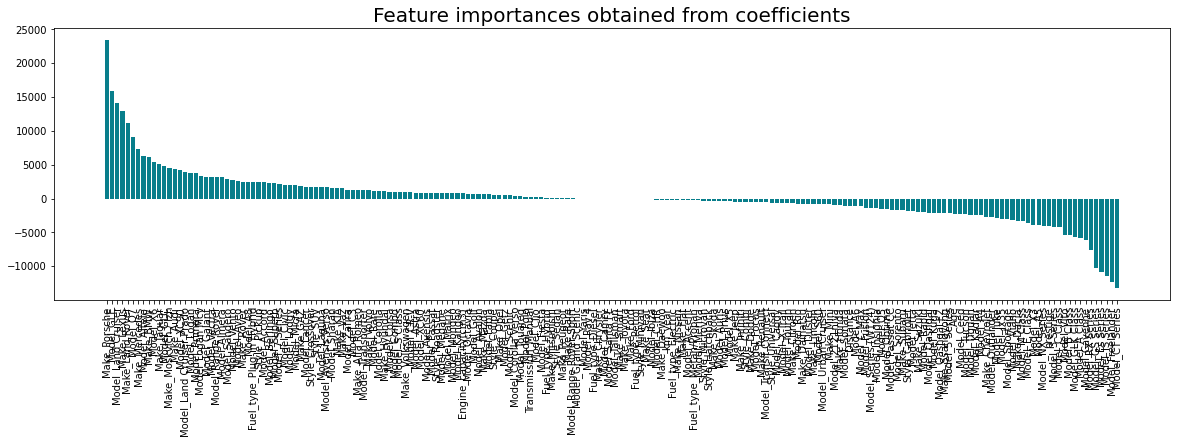

In [ ]:
importances(columns,models['Lasso'].coef_)

In [ ]:
def test2(models,X,y):
    results = {}
    for i in models:
      r2_train = []
      r2_test = []

      X_train, X_test, y_train, y_test = train_test_split(X,
                                                          y,
                                                          test_size= 0.2)
      X_train=pipe['pipe1'].fit_transform(X_train)
      X_test=pipe['pipe1'].transform(X_test)
      r2_test.append(metrics.r2_score(y_test,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_test)))
      r2_train.append(metrics.r2_score(y_train,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_train)))
      results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pipe_ridge = Pipeline([
    ('preprocessors', preprocessors_),
    ('model', Ridge())
])
pipe_lasso = Pipeline([
    ('preprocessors', preprocessors_),
    ('model', Lasso())
])

lasso_params = {'model__alpha':np.logspace(-1, 2, 20)}
ridge_params = {'model__alpha':np.logspace(-1, 2, 20)}

models = { 'LR': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(estimator=pipe_lasso,
                               param_grid=lasso_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(estimator=pipe_ridge,
                               param_grid=ridge_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,}

models = { 'LR': models['LR'],
           'Lasso': models['Lasso']['model'],
           'Ridge': models['Ridge']['model'],}

test2(models, X,y)

,LR,Lasso,Ridge
0,0.594561,0.595875,0.595687
1,0.602127,0.594795,0.597428


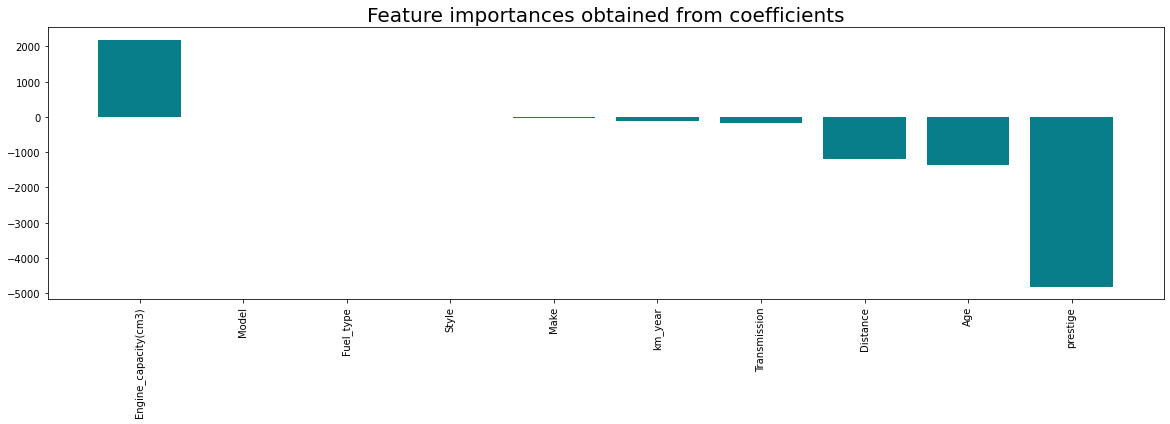

In [ ]:
importances(columns_,models['Lasso'].coef_)

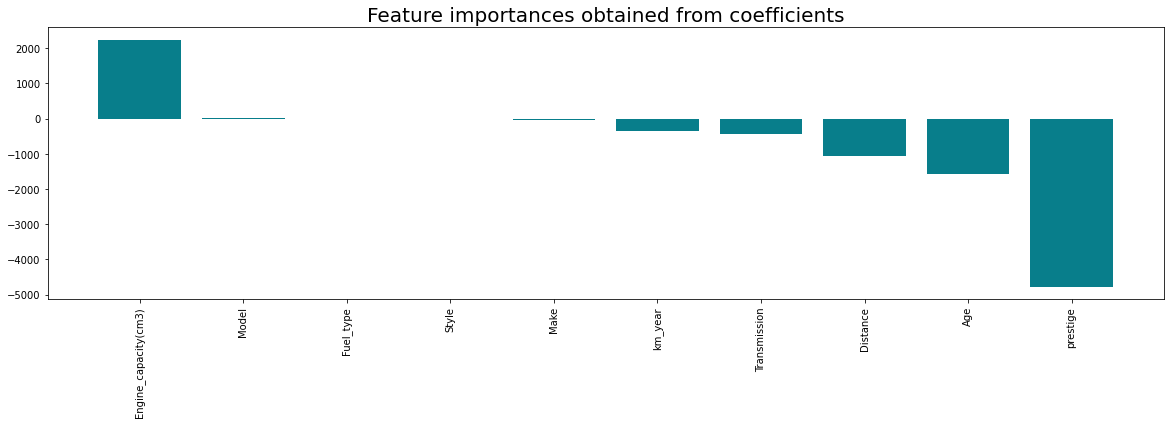

In [ ]:
importances(columns_,models['Ridge'].coef_)

In [ ]:
cat_pipe_one = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))
])
cat_pipe_ordinal = Pipeline([
    ('encoder', OrdinalEncoder( ))
])

numerical_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler())
])
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', cat_pipe_one, cat_columns)
])
preprocessors_ = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', cat_pipe_ordinal, cat_columns)
])

pipe_one_1 = Pipeline([
    ('preprocessors', preprocessors),
])
pipe_ordinal_1 = Pipeline([
    ('preprocessors', preprocessors_),
])

pipe=dict()
pipe['pipe0']=pipe_one_1
pipe['pipe1']=pipe_ordinal_1

In [ ]:
def test3(models,X,y):
    results = {}
    for i in models:
      r2_train = []
      r2_test = []

      X_train, X_test, y_train, y_test = train_test_split(X,
                                                          y,
                                                          test_size= 0.2)
      X_train=pipe['pipe0'].fit_transform(X_train)
      X_test=pipe['pipe0'].transform(X_test)
      r2_test.append(metrics.r2_score(y_test,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_test)))
      r2_train.append(metrics.r2_score(y_train,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_train)))
      results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)
def test4(models,X,y):
    results = {}
    for i in models:
      r2_train = []
      r2_test = []

      X_train, X_test, y_train, y_test = train_test_split(X,
                                                          y,
                                                          test_size= 0.2)
      X_train=pipe['pipe1'].fit_transform(X_train)
      X_test=pipe['pipe1'].transform(X_test)
      r2_test.append(metrics.r2_score(y_test,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_test)))
      r2_train.append(metrics.r2_score(y_train,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_train)))
      results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
pipe_ridge = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Ridge())
])
pipe_lasso = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Lasso())
])

lasso_params = {'model__alpha':np.logspace(-1, 2, 20)}
ridge_params = {'model__alpha':np.logspace(-1, 2, 20)}

models = { 'LR': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(estimator=pipe_lasso,
                               param_grid=lasso_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(estimator=pipe_ridge,
                               param_grid=ridge_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,}

models = { 'LR': models['LR'],
           'Lasso': models['Lasso']['model'],
           'Ridge': models['Ridge']['model'],}

test3(models, X,y)

,LR,Lasso,Ridge
0,0.788214,0.785841,0.782945
1,0.762584,0.770974,0.785129


In [ ]:
pipe_ridge = Pipeline([
    ('preprocessors', preprocessors_),
    ('model', Ridge())
])
pipe_lasso = Pipeline([
    ('preprocessors', preprocessors_),
    ('model', Lasso())
])

lasso_params = {'model__alpha':np.logspace(-1, 2, 20)}
ridge_params = {'model__alpha':np.logspace(-1, 2, 20)}

models = { 'LR': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(estimator=pipe_lasso,
                               param_grid=lasso_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(estimator=pipe_ridge,
                               param_grid=ridge_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,}

models = { 'LR': models['LR'],
           'Lasso': models['Lasso']['model'],
           'Ridge': models['Ridge']['model'],}

test4(models, X,y)

,LR,Lasso,Ridge
0,0.737420,0.737570,0.738415
1,0.735446,0.731212,0.727863


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
numerical_transformer = Pipeline([('poly_featurizer_', PolynomialFeatures(degree=4)),
                                   ('scaler_', StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, num_columns),
                          ('encoder', OrdinalEncoder(), cat_columns)
                         ])
pipeline=Pipeline([('column_transformer', ct),
                   ('model_', LinearRegression() )])

cv_res = cross_validate(pipeline, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res

{'fit_time': array([0.2167604 , 0.26010561, 0.26119852, 0.24606299, 0.2349596 ]),
 'score_time': array([0.03407264, 0.03047419, 0.02587962, 0.02850771, 0.0275991 ]),
 'test_score': array([0.84570307, 0.79571481, 0.75476736, 0.79741599, 0.79767382]),
 'train_score': array([0.81209556, 0.82281163, 0.82130132, 0.8220497 , 0.82105373])}

In [ ]:
cv_res = cross_validate(pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
cv_res

{'fit_time': array([0.22791576, 0.2672348 , 0.27609539, 0.23756671, 0.24482083]),
 'score_time': array([0.0305326 , 0.02981138, 0.02602434, 0.04040766, 0.02967691]),
 'test_score': array([-3503.48702611, -4831.9132269 , -4530.02815044, -4180.3116549 ,
        -4057.05985504]),
 'train_score': array([-4182.55603677, -3855.63093887, -4066.18898903, -4035.47234464,
        -4071.38370853])}

In [ ]:
numerical_transformer = Pipeline([('poly_featurizer_', PolynomialFeatures(degree=4)),
                                   ('scaler_', StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, num_columns),
                          ('encoder', OrdinalEncoder(), cat_columns)
                         ])
pipeline=Pipeline([('column_transformer', ct),])

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
RMSE:  4723.4118450108945
Variance score: 0.77


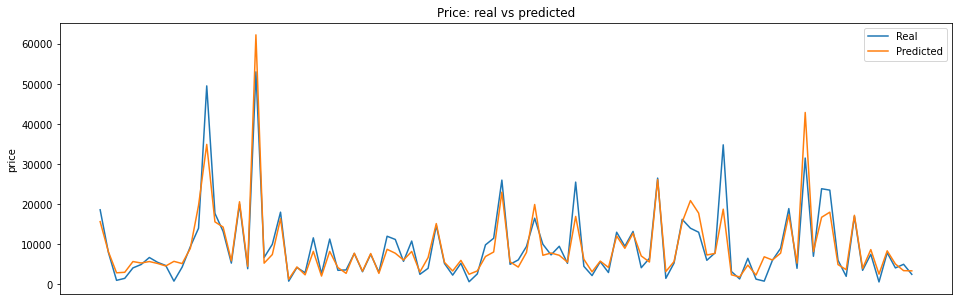

In [ ]:
regr = linear_model.LinearRegression()
X_train_=pipeline.fit_transform(X_train)
X_test_=pipeline.fit_transform(X_test)
regr.fit(X_train_, y_train)

predicted = regr.predict(X_test_)

A = np.array(y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
rmse = np.sqrt(mean_squared_error(y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(y_test, predicted))
plt.show()

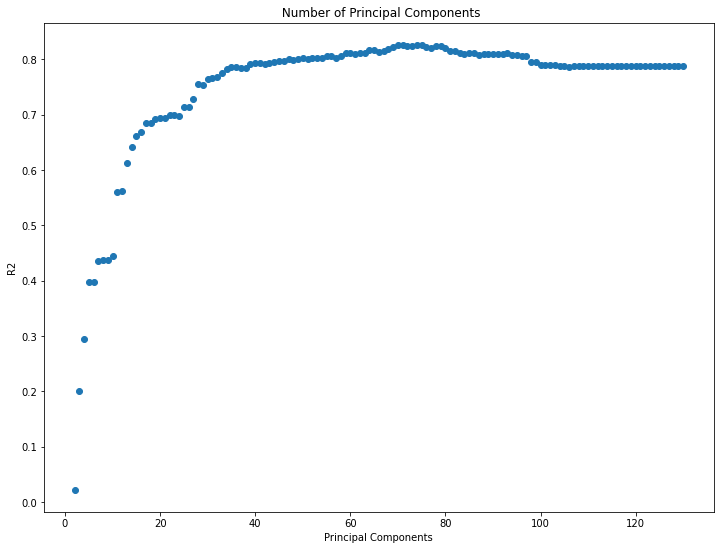

In [ ]:
X2=pipeline.fit_transform(X)
X2=pd.DataFrame(X2)
def do_pca(n_components,X):
  pca=PCA(n_components)
  X_pca=pca.fit_transform(X2)
  return pca,X_pca



def fit_L_R(X, y, print_output=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    clf =LinearRegression()
    clf.fit(X_train, y_train)

    y_preds = clf.predict(X_test)

    R2=r2_score(y_test, y_preds)

    return R2


acc_list, pc_list = [], []
for pc in range(2,X2.shape[1]):
    pca, X_pca = do_pca(pc,X2)
    acc = fit_L_R(X_pca,y)
    acc_list.append(acc)
    pc_list.append(pc)

plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title(' Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('R2');

In [ ]:
categorical_pipe = Pipeline([
    ('encoder', OrdinalEncoder( ))
])

numerical_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=4)),
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components=60)),
])
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])
pipe = Pipeline([
    ('preprocessors', preprocessors),
])

def test1(models,X,y):
    results = {}
    for i in models:
      r2_train = []
      r2_test = []

      X_train, X_test, y_train, y_test = train_test_split(X,
                                                          y,
                                                          test_size= 0.2)
      X_train=pipe.fit_transform(X_train)
      X_test=pipe.transform(X_test)
      r2_test.append(metrics.r2_score(y_test,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_test)))
      r2_train.append(metrics.r2_score(y_train,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_train)))
      results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
pipe_ridge = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Ridge())
])
pipe_lasso = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Lasso())
])

lasso_params = {'model__alpha':np.logspace(-1, 2, 20)}
ridge_params = {'model__alpha':np.logspace(-1, 2, 20)}

models_ = { 'LR': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(estimator=pipe_lasso,
                               param_grid=lasso_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(estimator=pipe_ridge,
                               param_grid=ridge_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,}

models = { 'LR': models_['LR'],
           'Lasso': models_['Lasso']['model'],
           'Ridge': models_['Ridge']['model'],}

test1(models, X,y)

,LR,Lasso,Ridge
0,0.811692,0.811923,0.808346
1,0.788082,0.790962,0.793808


In [ ]:
models_["Lasso"]["model"]

Lasso(alpha=0.14384498882876628)

In [ ]:
numerical_transformer = Pipeline([('poly_featurizer_', PolynomialFeatures(degree=4)),
                                   ('scaler_', StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, num_columns),
                          ('encoder', OrdinalEncoder(), cat_columns)
                         ])
pipeline=Pipeline([('column_transformer', ct),
                   ('model_', Lasso(alpha=0.14384498882876628) )])

cv_res = cross_validate(pipeline, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res

{'fit_time': array([3.58250737, 2.85979152, 2.94443846, 3.62899899, 2.86122823]),
 'score_time': array([0.03519297, 0.03360367, 0.03045201, 0.05833292, 0.02701998]),
 'test_score': array([0.83577037, 0.78344912, 0.7970542 , 0.78506613, 0.78858066]),
 'train_score': array([0.80059146, 0.81113966, 0.80918744, 0.81044145, 0.80983143])}

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
RMSE:  4228.387092579135
Variance score: 0.82


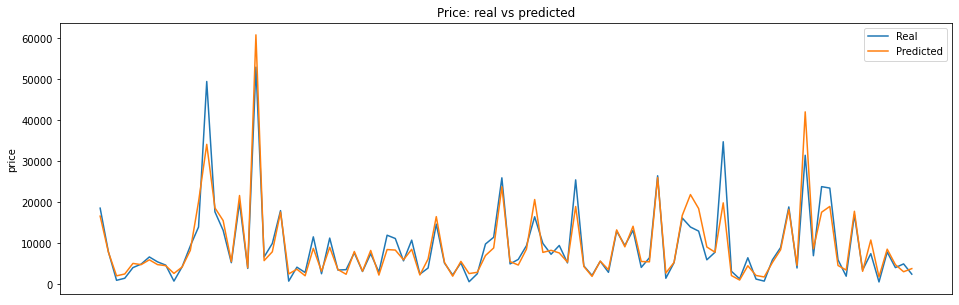

In [ ]:
numerical_transformer = Pipeline([('poly_featurizer_', PolynomialFeatures(degree=4)),
                                   ('scaler_', StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, num_columns),
                          ('encoder', OrdinalEncoder(), cat_columns)
                         ])
pipeline=Pipeline([('column_transformer', ct),])


regr = Lasso(alpha=0.14384498882876628)
X_train_=pipeline.fit_transform(X_train)
X_test_=pipeline.fit_transform(X_test)
regr.fit(X_train_, y_train)

predicted = regr.predict(X_test_)

A = np.array(y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
rmse = np.sqrt(mean_squared_error(y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(y_test, predicted))
plt.show()


In [ ]:
from scipy.stats import norm, skew

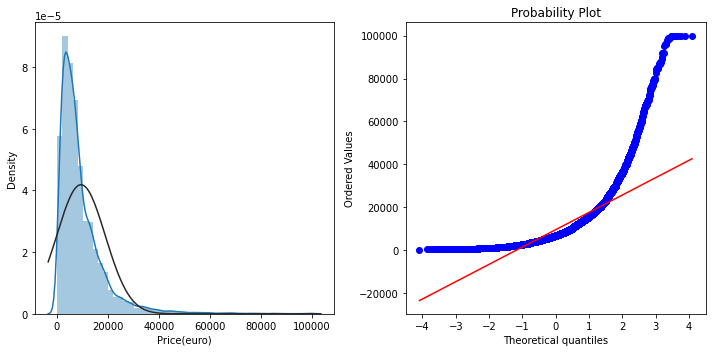

mu: 9479.188, sigma: 9531.397


In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.distplot(y, fit = norm, ax = ax[0])
stats.probplot(y, plot = plt)

plt.tight_layout()
plt.show()

mu, sigma = norm.fit(y)
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))

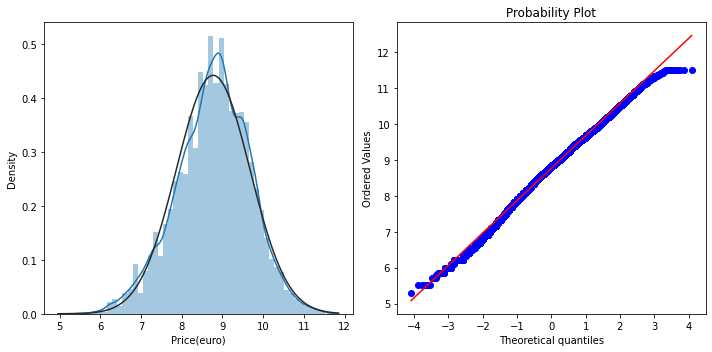

mu: 8.772, sigma: 0.904


In [ ]:
# apply log-transformation

y= np.log1p(y)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.distplot(y, fit = norm, ax = ax[0])
stats.probplot(y, plot = plt)

plt.tight_layout()
plt.show()

mu, sigma = norm.fit(y)
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))

In [ ]:
y=pd.DataFrame(y)
from sklearn.preprocessing import PowerTransformer

In [ ]:
numerical_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('power', PowerTransformer()),
    ('scaler', StandardScaler()),
])
categorical_pipe = Pipeline([
    #('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))
    ('encoder', OrdinalEncoder( ))
])
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])
pipe = Pipeline([
    ('preprocessors', preprocessors),
])

def test1(models,X,y):
    results = {}
    for i in models:
      r2_train = []
      r2_test = []

      X_train, X_test, y_train, y_test = train_test_split(X,
                                                          y,
                                                          test_size= 0.2)
      X_train=pipe.fit_transform(X_train)
      X_test=pipe.transform(X_test)
      r2_test.append(metrics.r2_score(y_test,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_test)))
      r2_train.append(metrics.r2_score(y_train,
                                      models[i].fit(X_train,
                                                    y_train).predict(X_train)))
      results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
pipe_ridge = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Ridge())
])
pipe_lasso = Pipeline([
    ('preprocessors', preprocessors),
    ('model', Lasso())
])

lasso_params = {'model__alpha':np.logspace(-1, 2, 20)}
ridge_params = {'model__alpha':np.logspace(-1, 2, 20)}

models_ = { 'LR': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(estimator=pipe_lasso,
                               param_grid=lasso_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,
           'Ridge': GridSearchCV(estimator=pipe_ridge,
                               param_grid=ridge_params,
                               cv=ShuffleSplit(n_splits=5, random_state=42)).fit(X_train, y_train).best_estimator_,}

models = { 'LR': models_['LR'],
           'Lasso': models_['Lasso']['model'],
           'Ridge': models_['Ridge']['model'],}

test1(models, X,y)

,LR,Lasso,Ridge
0,0.894691,0.000000,0.890864
1,0.898923,-0.000086,0.891278


In [ ]:
models_['Lasso']['model']

Lasso(alpha=3.79269019073225)

In [ ]:
models_['Lasso']['model'].coef_

array([ 0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0.])

In [ ]:
models_['Lasso']['model'].coef_.shape

(26,)

In [ ]:
import sklearn

In [ ]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)

    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]

    ### Start of processing
    feature_names = []

    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))


    for name, trans, column, _ in l_transformers:
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))

    return feature_names

In [ ]:
get_feature_names(preprocessors)

['poly__1',
 'poly__x0',
 'poly__x1',
 'poly__x2',
 'poly__x3',
 'poly__x4',
 'poly__x0^2',
 'poly__x0 x1',
 'poly__x0 x2',
 'poly__x0 x3',
 'poly__x0 x4',
 'poly__x1^2',
 'poly__x1 x2',
 'poly__x1 x3',
 'poly__x1 x4',
 'poly__x2^2',
 'poly__x2 x3',
 'poly__x2 x4',
 'poly__x3^2',
 'poly__x3 x4',
 'poly__x4^2',
 'cat__Make',
 'cat__Model',
 'cat__Style',
 'cat__Fuel_type',
 'cat__Transmission']

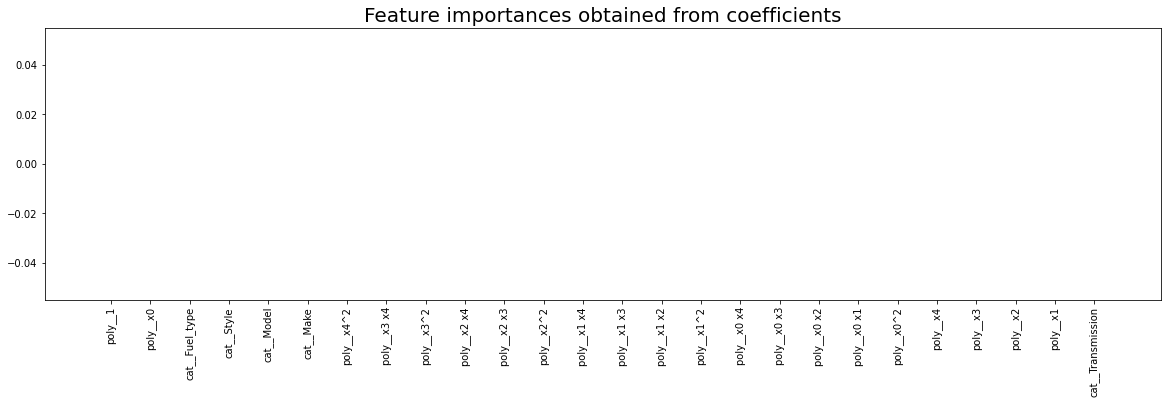

In [ ]:
importances(get_feature_names(preprocessors),models_['Lasso']['model'].coef_)